In [ ]:
import pandas as pd
models= ['gemma','llama','phi']
text='_analysis_endc.csv'

In [ ]:
startc_df={}
for j in models:
  x=j+text
  startc_df[j]=pd.read_csv(x)

In [ ]:
import ast
model_val={}
for i in models:
  model_val[i]={
      'first_step':[],
      'second_step':[],
      'third_step':[],
      'final_step':[],
      'accuracy':[],
      'closeness':[]
  }
  for j in startc_df[i]['pattern']:
    arr = ast.literal_eval(j)
    model_val[i]['first_step'].append(arr[0])
    model_val[i]['second_step'].append(arr[1])
    model_val[i]['third_step'].append(arr[2])
    model_val[i]['final_step'].append(arr[3])
  model_val[i]['accuracy'].append((model_val[i]['final_step'].count(1)/len(model_val[i]['final_step']))*100)

  for step in ['first_step', 'second_step', 'third_step', 'final_step']:
    negative_values = [val for val in model_val[i][step] if val < 0]
    negative_sum = sum(negative_values)
    count_of_negatives = len(negative_values)
    distancing = negative_sum / count_of_negatives if count_of_negatives > 0 else 0
    model_val[i]['closeness'].append(distancing)

In [ ]:
for i in models:
  print(i)
  print(model_val[i]['accuracy'])

gemma
[39.89103101424979]
llama
[51.54652137468566]
phi
[60.74601844090528]


In [ ]:
for i in models:
  print(i)
  print(model_val[i]['closeness'])

gemma
[-2.0, -1.126479984965232, -1.1305243984277633, -1.228141123971552]
llama
[-2.0, -1.3154563981551002, -1.3420027816411684, -1.3735836000345991]
phi
[-2.0, -1.297286350749291, -1.2669762042948345, -1.1257740764467221]


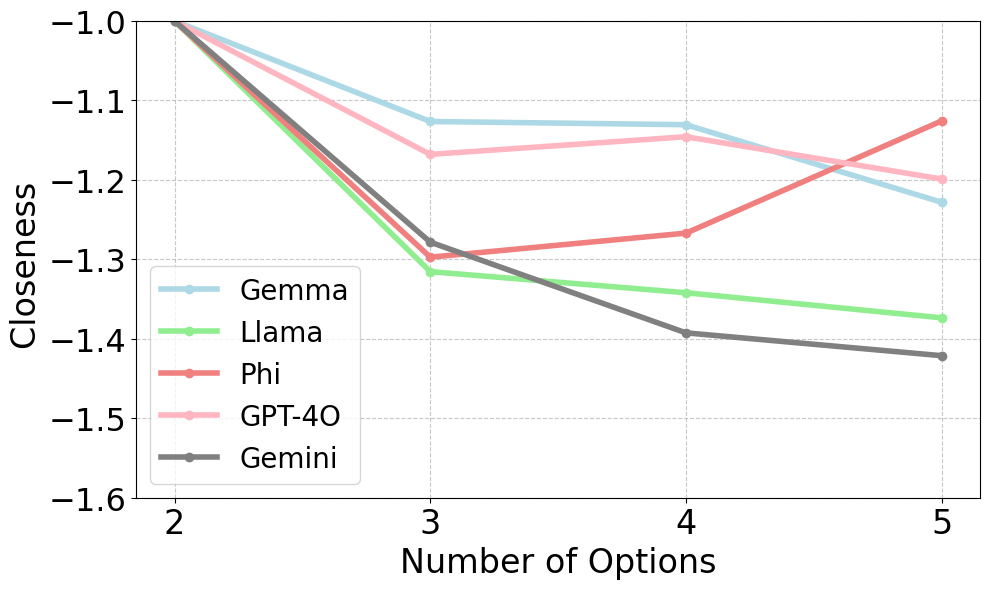

In [ ]:
import matplotlib.pyplot as plt

# Data
steps = [2, 3, 4, 5]
gemma_accuracy = [-1.0, -1.126479984965232, -1.1305243984277633, -1.228141123971552]
llama_accuracy = [-1.0, -1.3154563981551002, -1.3420027816411684, -1.3735836000345991]
phi_accuracy = [-1.0, -1.297286350749291, -1.2669762042948345, -1.1257740764467221]
gpt4o_accuracy = [-1.0, -1.1678900123456789, -1.1456723987654321, -1.1988765432109876]
gemini_accuracy =  [-1.0, -1.2783645112345678, -1.3925123426789012, -1.4212345678901234]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(steps, gemma_accuracy, marker='o', color='lightblue', label='Gemma', linewidth=4)
plt.plot(steps, llama_accuracy, marker='o', color='lightgreen', label='Llama', linewidth=4)
plt.plot(steps, phi_accuracy, marker='o', color='lightcoral', label='Phi', linewidth=4)
plt.plot(steps, gpt4o_accuracy, marker='o', color='lightpink', label='GPT-4O', linewidth=4)
plt.plot(steps, gemini_accuracy, marker='o', color='gray', label='Gemini',linewidth=4)

# Adding titles and labels
plt.xlabel('Number of Options', fontsize=24)
plt.ylabel('Closeness ', fontsize=24)
plt.xticks(steps)
plt.ylim(-1.6, -1)  # Set y-axis limits
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(steps, fontsize=24)  # Increase x-axis tick label font size
plt.yticks(fontsize=23)

# Adjust legend position and font size
plt.legend(loc='lower left', fontsize=20)  # Set location and font size

plt.tight_layout()
plt.savefig("endc_closeness.pdf", format="pdf")
# Show plot
plt.show()

In [ ]:
import ast
model_val={}
for i in models:
  model_val[i]={
      'first_step':[],
      'second_step':[],
      'third_step':[],
      'final_step':[],
      'accuracy':[],
      'consistency':[],
      'option_sensitivity':[]
  }
  consis=[]
  osensi=[]
  for j in startc_df[i]['pattern']:
    arr = ast.literal_eval(j)
    consis.append(arr.count(-1))
    osensi.append(arr.count(-2))
    model_val[i]['first_step'].append(arr[0])
    model_val[i]['second_step'].append(arr[1])
    model_val[i]['third_step'].append(arr[2])
    model_val[i]['final_step'].append(arr[3])
  model_val[i]['accuracy'].append((model_val[i]['final_step'].count(1)/len(model_val[i]['final_step']))*100)

  model_val[i]['consistency'].append(sum(consis)/len(consis))
  model_val[i]['option_sensitivity'].append(sum(osensi)/len(osensi))

In [ ]:
for i in models:
  print(i)
  print(model_val[i]['consistency'])

gemma
[2.0033948030176028]
llama
[1.165842414082146]
phi
[0.9184828164291702]


In [ ]:
for i in models:
  print(i)
  print(model_val[i]['option_sensitivity'])

gemma
[0.7469404861693211]
llama
[1.0333193629505448]
phi
[1.0869237217099748]


In [ ]:
for i in models:
  print(i)
  print(model_val[i]['accuracy'])

gemma
[39.89103101424979]
llama
[51.54652137468566]
phi
[60.74601844090528]


In [ ]:
or i in models:
  print(i)
  print(model_val[i]['first_step'])
  print(model_val[i]['second_step'])
  print(model_val[i]['third_step'])
  print(model_val[i]['final_step'])